<a href="https://colab.research.google.com/github/ahmedtarek-/Hohez/blob/master/Exercise_11/MI11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Intelligence 11

Package:
https://pgmpy.org/detailed_notebooks/2.%20Bayesian%20Networks.html

## Exercise 3 

### Description of the model

Model:
https://www.cs.ubc.ca/~murphyk/Bayes/bnintro.html

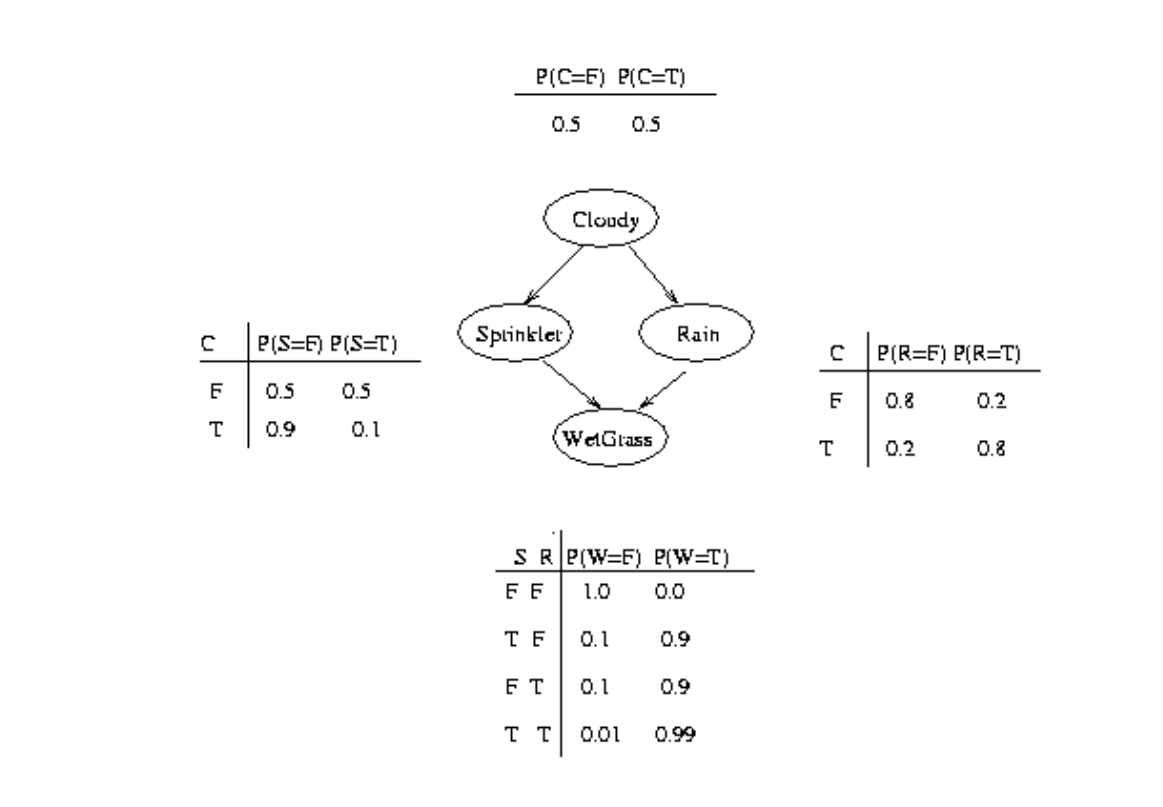

In [11]:
from IPython.display import Image
Image('/content/Screen Shot 2023-02-02 at 12.00.09 AM.png')


### 0) Download and import PGmPY

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

----
### 1) Define the model

In [13]:

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork([('C', 'S'), ('C', 'R'), ('S', 'W'), ('R', 'W')])

# Defining individual CPDs.
cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.5], [0.5]])


cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.5, 0.9],
                           [0.5, 0.1]],
                  evidence=['C'],
                  evidence_card=[2])

cpd_r = TabularCPD(variable='R', variable_card=2,
                   values=[[0.8, 0.2],
                           [0.2, 0.8]],
                  evidence=['C'],
                  evidence_card=[2])

cpd_w = TabularCPD(variable='W', variable_card=2,
                   values=[[1.0, 0.1, 0.1, 0.01],
                           [0.0, 0.9, 0.9, 0.99]],
                  evidence=['S', 'R'],
                  evidence_card=[2,2])

------
### 2) Check the model

In [14]:
# Associating the CPDs with the network
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

True

In [15]:
model.get_cardinality('W')
print(model.get_cpds('W'))

+------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| R    | R(0) | R(1) | R(0) | R(1) |
+------+------+------+------+------+
| W(0) | 1.0  | 0.1  | 0.1  | 0.01 |
+------+------+------+------+------+
| W(1) | 0.0  | 0.9  | 0.9  | 0.99 |
+------+------+------+------+------+



### 3) Doin some inference

_a. What's probability of sprinkler ON after observing that glass is wet_

In [16]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

print(infer.query(['S'], evidence={'W': 1}))

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5702 |
+------+----------+
| S(1) |   0.4298 |
+------+----------+


_b. What about if the has rained recently? (should be less)_ 

In [17]:
print(infer.query(['S'], evidence={'W': 1, 'R': 1}))

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8055 |
+------+----------+
| S(1) |   0.1945 |
+------+----------+


----
## Exercise 3 

### Description of the model

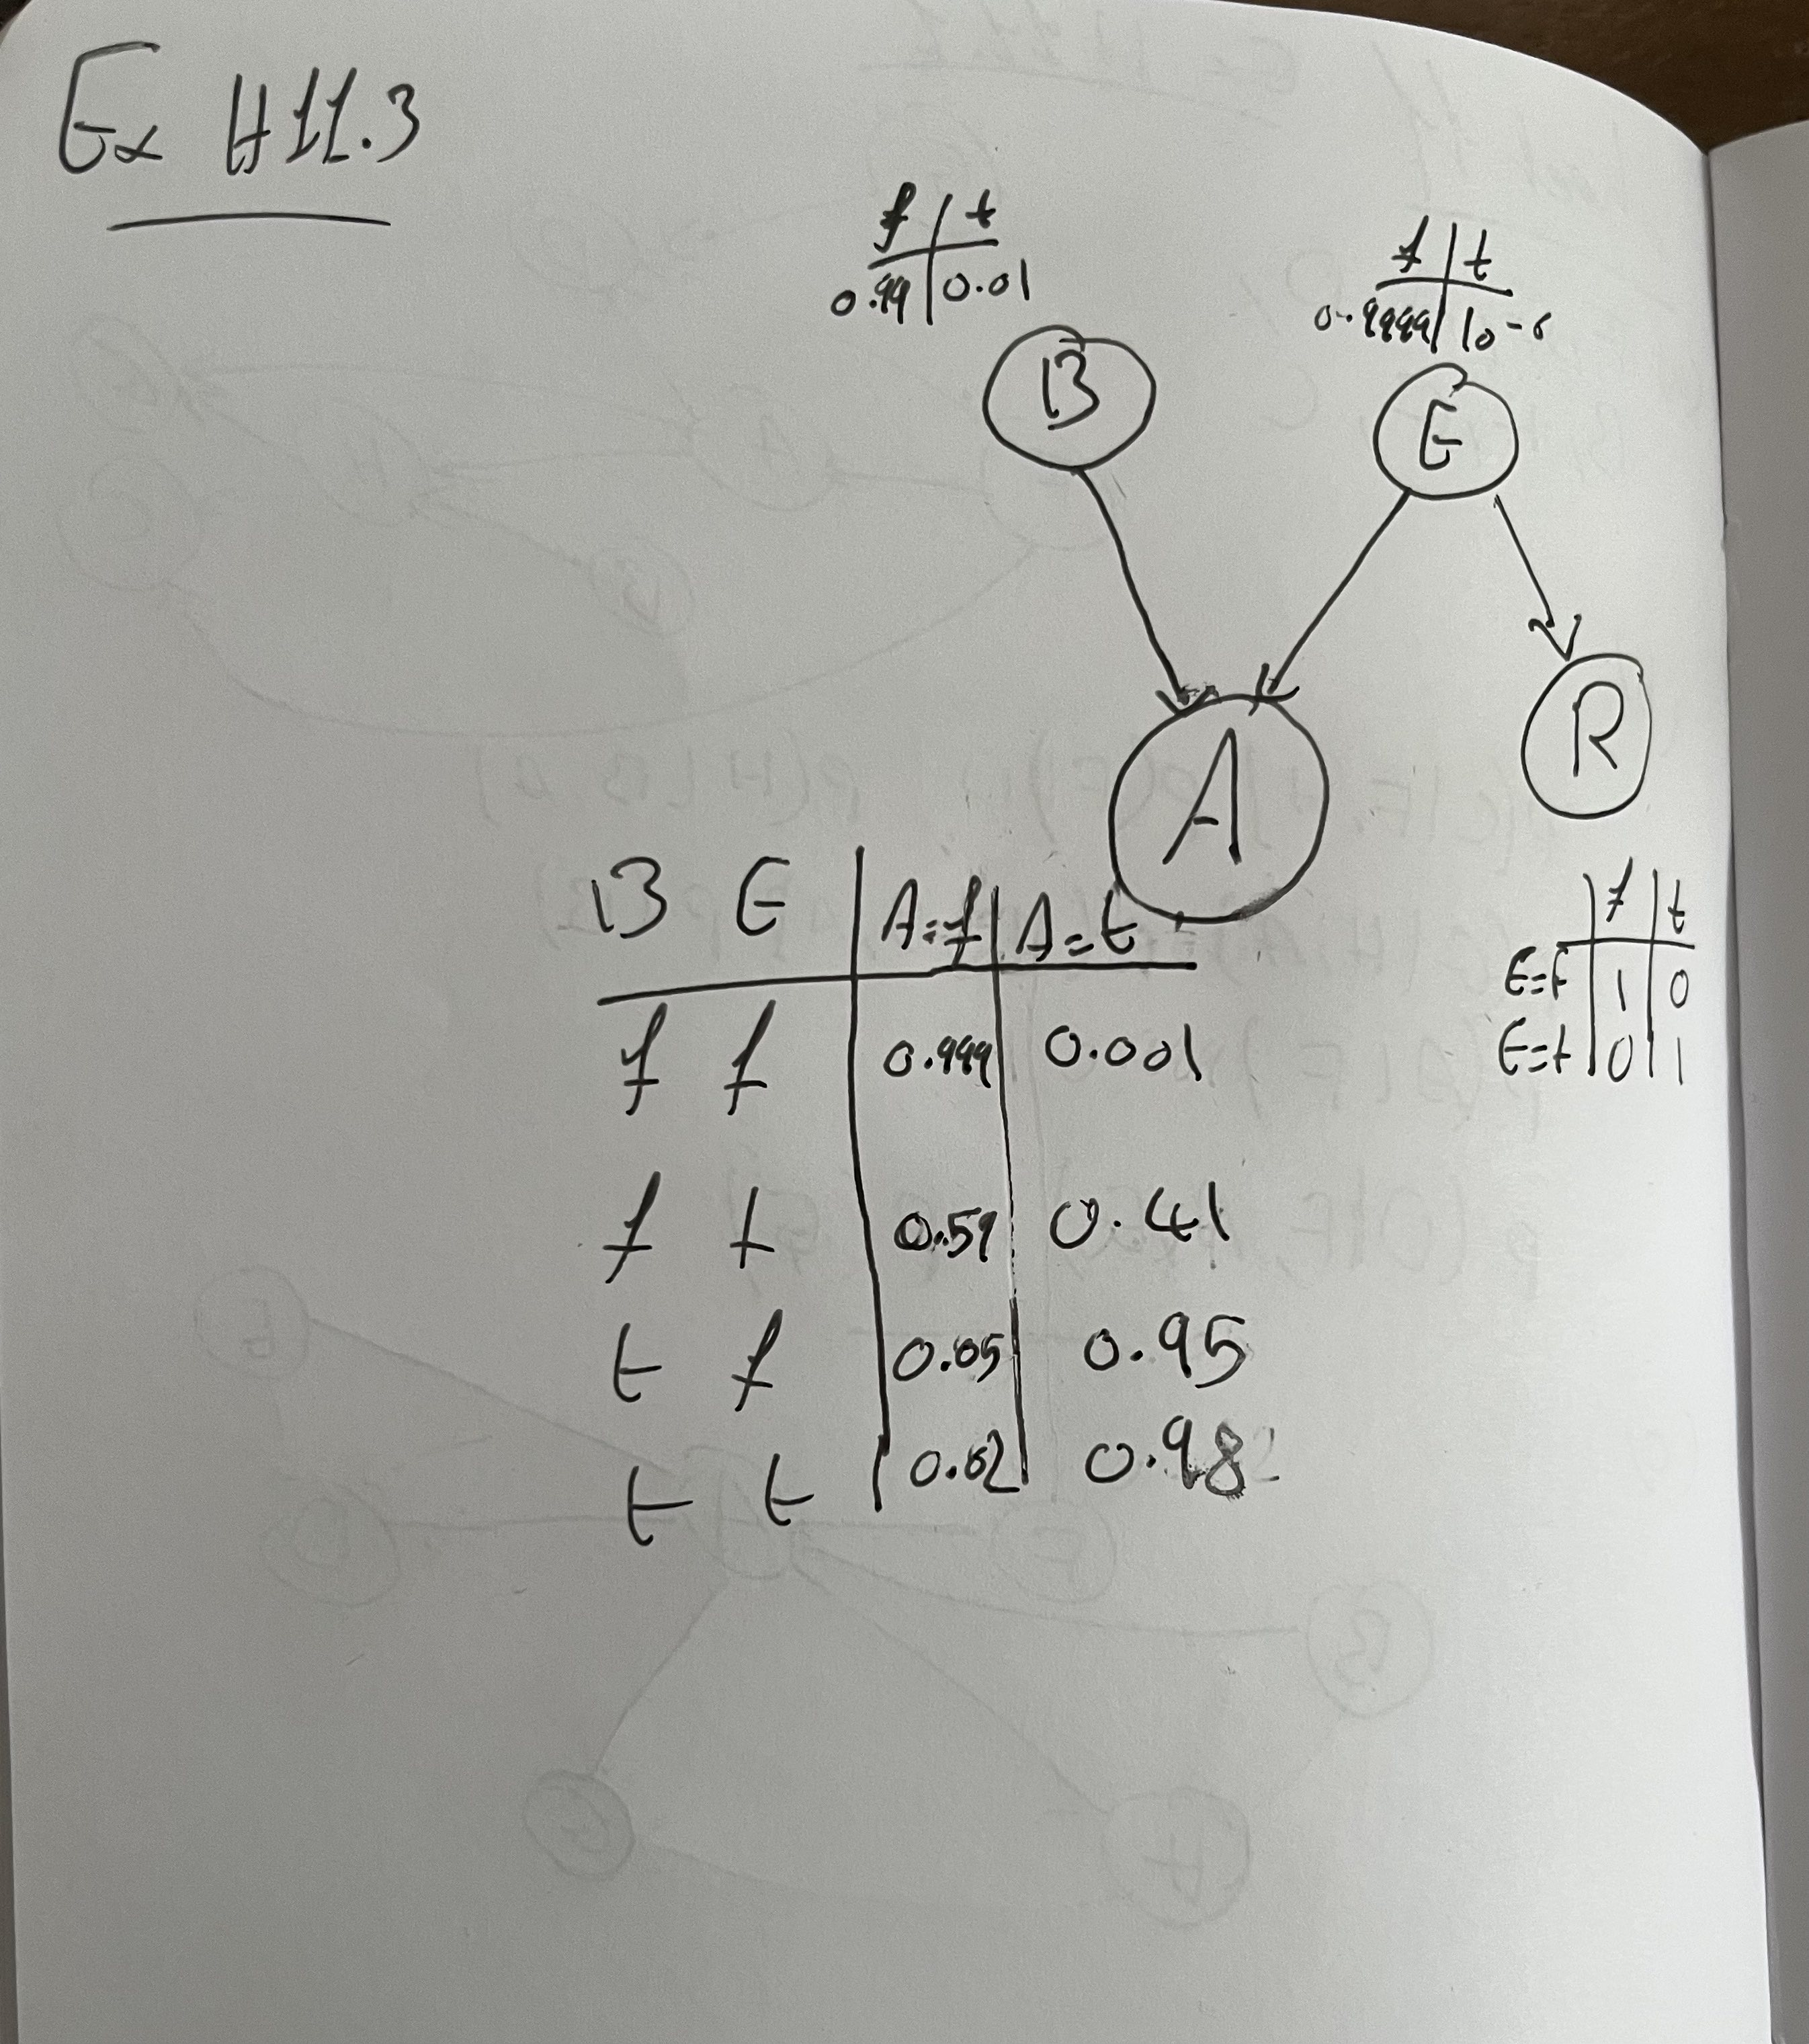

In [22]:
Image('/content/DAG.jpg', width = 600)

### 1) Defining the model

In [30]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork([('B', 'A'), ('E', 'A'), ('E', 'R')])

# Defining individual CPDs.
cpd_b = TabularCPD(variable='B', variable_card=2, values=[[0.99], [0.01]])
cpd_e = TabularCPD(variable='E', variable_card=2, values=[[0.999999], [0.000001]])

cpd_r = TabularCPD(variable='R', variable_card=2,
                   values=[[1.0, 0.0],
                           [0.0, 1.0]],
                  evidence=['E'],
                  evidence_card=[2])

cpd_a = TabularCPD(variable='A', variable_card=2,
                   values=[[0.999, 0.59, 0.05, 0.02],
                           [0.001, 0.41, 0.95, 0.98]],
                  evidence=['B', 'E'],
                  evidence_card=[2, 2])

model.add_cpds(cpd_b, cpd_e, cpd_r, cpd_a)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

True

### 2) Doin some inference

- P(A = t)

- P(A|R = t)

- P(B = t|A = t)

- P(B = t|A = t, R = t)

In [35]:
infer = VariableElimination(model)


print("P(A = t)")
print(infer.query(['A']))
print("------------------------\n")
print("P(A | R = t)")
print(infer.query(['A'], evidence={'R': 1}))
print("------------------------\n")

print("P(B = t|A = t)")
print(infer.query(['B'], evidence={'A': 1}))
print("------------------------\n")
print("P(B = t|A = t, R = t)")
print(infer.query(['B'], evidence={'A': 1, 'R': 1}))
print("------------------------\n")

P(A = t)
+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.9895 |
+------+----------+
| A(1) |   0.0105 |
+------+----------+
------------------------

P(A | R = t)
+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.5843 |
+------+----------+
| A(1) |   0.4157 |
+------+----------+
------------------------

P(B = t|A = t)
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.0944 |
+------+----------+
| B(1) |   0.9056 |
+------+----------+
------------------------

P(B = t|A = t, R = t)
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.9764 |
+------+----------+
| B(1) |   0.0236 |
+------+----------+
------------------------

